<a href="https://colab.research.google.com/github/richiehutomoo/PORTFOLIO/blob/main/Metode_IQR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Statistik Deskriptif Sebelum Penghapusan Outlier:
count    140.000000
mean      98.223571
std       12.042064
min       60.000000
25%       90.900000
50%       97.200000
75%      106.000000
max      129.000000
Name: Daily Reading Duration (in minutes), dtype: float64

Jumlah baris data awal: 140


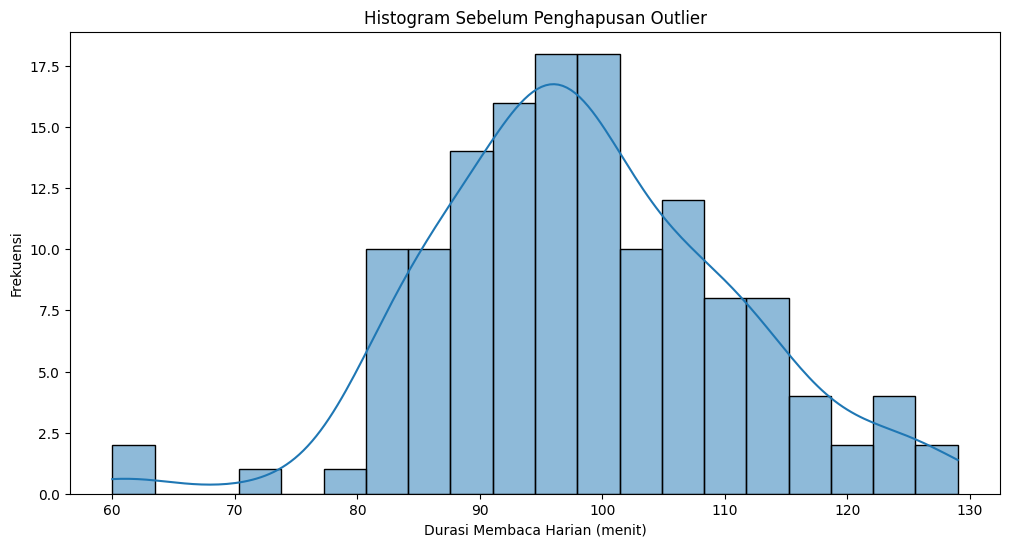


--- Penerapan Metode IQR ---
Q1: 90.90
Q3: 106.00
IQR: 15.10
Batas Bawah: 68.25
Batas Atas: 128.65

Jumlah baris data setelah penghapusan outlier: 137
Jumlah outlier yang dihapus: 3

Statistik Deskriptif Setelah Penghapusan Outlier:
count    137.000000
mean      98.544526
std       10.981354
min       73.000000
25%       91.000000
50%       97.400000
75%      106.000000
max      126.000000
Name: Daily Reading Duration (in minutes), dtype: float64


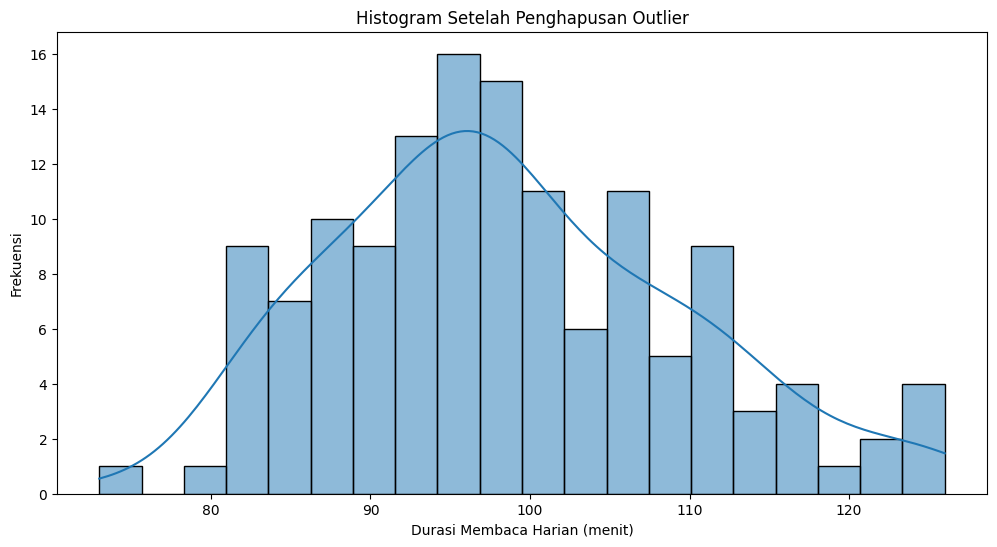

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('TGM 2020-2023_eng.csv', delimiter=';')
except FileNotFoundError:
    print("Pastikan berkas 'TGM 2020-2023_eng.csv' ada di direktori yang sama.")
except Exception as e:
    print(f"Terjadi kesalahan saat membaca berkas: {e}")

cols_to_convert = ['Reading Frequency per week', 'Number of Readings per Quarter', 'Daily Reading Duration (in minutes)', 'Internet Access Frequency per Week', 'Daily Internet Duration (in minutes)', 'Tingkat Kegemaran Membaca (Reading Interest)']
for col in cols_to_convert:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')

df.dropna(subset=['Daily Reading Duration (in minutes)'], inplace=True)

kolom_target = 'Daily Reading Duration (in minutes)'

print("Statistik Deskriptif Sebelum Penghapusan Outlier:")
print(df[kolom_target].describe())
print("\nJumlah baris data awal:", len(df))

plt.figure(figsize=(12, 6))
sns.histplot(df[kolom_target], kde=True, bins=20)
plt.title('Histogram Sebelum Penghapusan Outlier')
plt.xlabel('Durasi Membaca Harian (menit)')
plt.ylabel('Frekuensi')
plt.show()

Q1 = df[kolom_target].quantile(0.25)
Q3 = df[kolom_target].quantile(0.75)
IQR = Q3 - Q1
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

df_clean = df[(df[kolom_target] >= batas_bawah) & (df[kolom_target] <= batas_atas)].copy()

print("\n--- Penerapan Metode IQR ---")
print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Batas Bawah: {batas_bawah:.2f}")
print(f"Batas Atas: {batas_atas:.2f}")

print("\nJumlah baris data setelah penghapusan outlier:", len(df_clean))
print("Jumlah outlier yang dihapus:", len(df) - len(df_clean))
print("\nStatistik Deskriptif Setelah Penghapusan Outlier:")
print(df_clean[kolom_target].describe())

plt.figure(figsize=(12, 6))
sns.histplot(df_clean[kolom_target], kde=True, bins=20)
plt.title('Histogram Setelah Penghapusan Outlier')
plt.xlabel('Durasi Membaca Harian (menit)')
plt.ylabel('Frekuensi')
plt.show()